![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

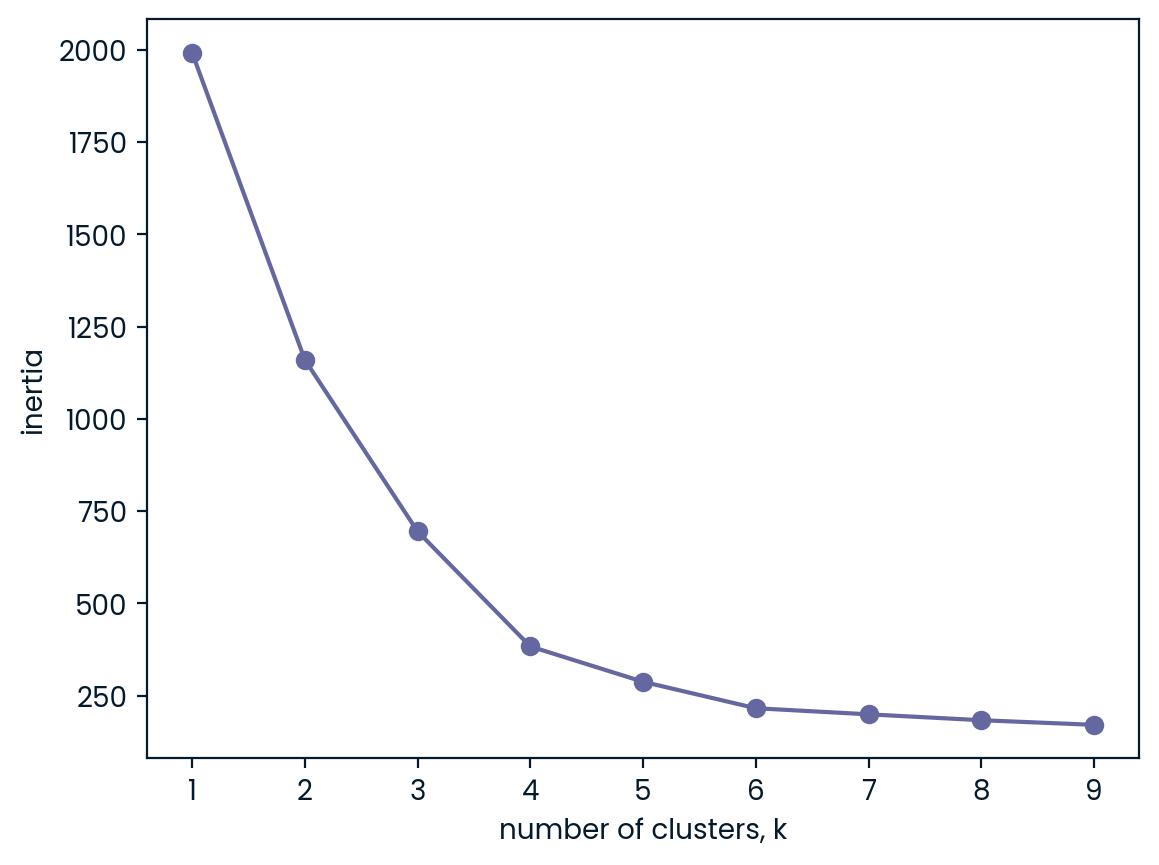

In [12]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

#Create dummies
penguins_df = pd.get_dummies(penguins_df, dtype='int')

#scaling
scaler = StandardScaler()
penguins_preprocessed = pd.DataFrame(data=scaler.fit_transform(penguins_df), columns=penguins_df.columns)

#Elbow Analysis
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_preprocessed)
labels = kmeans.labels_

#Final Statistical DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_df['label'] = labels
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
